In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
path = '/content/drive/My Drive/CS682/FinalProject/Milestone'
os.chdir(path)

# Importing packages

In [2]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.layers import Dense
from keras import regularizers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from sklearn.model_selection import cross_val_score
from sklearn import model_selection

import seaborn as sns
import time
from timeit import timeit
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)
from textblob import TextBlob
from unidecode import unidecode

# Importing Dataset into Pandas dataframe

In [4]:
data = pd.read_csv('cleaned_data.csv')
data['sentiment'] = data['sentiment'].astype('category')
data = data.dropna(subset=['cleaned_content'])
data.shape

(39781, 4)

# TF-IDF Vectorization


In [5]:
tfidf_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    min_df=5,
    norm='l2',
    ngram_range=(1, 2)
    )
X = tfidf_vectorizer.fit_transform(data['cleaned_content'])

# Split the data into train-val-test:70-20-10
X_train, X_temp, y_train, y_temp = train_test_split(X, data['sentiment'], test_size=0.3, random_state=66)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=66)

# Print the first 10 features
# print(tfidf_vectorizer.get_feature_names_out()[:10])

# Applying Naive Bayes with TFIDF vectorization

In [6]:
%%time

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

y_pred_test = nb_classifier.predict(X_test)

# Calculate the accuracy score
accuracy_score = metrics.accuracy_score(y_test, y_pred_test)
print(accuracy_score)

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)

print(classification_report(y_test,y_pred_test))

0.31886265549631887
[[  0   0   0   0   0   1   0   0   6   0   0   0   6]
 [  0   0   0   0   0   0   0   0   6   0   1   0   4]
 [  0   0   0   0   0   3   0   0  48   0   2   0  26]
 [  0   0   0   0   0   6   0   1  46   0   2   0  29]
 [  0   0   0   0   0  25   0   3  77   0   0   0  53]
 [  0   0   0   0   0 119   0  45 229   0   6   0 123]
 [  0   0   0   0   0   0   1   0  24   0  12   0  88]
 [  0   0   0   0   0  66   0  87 140   0   4   0  77]
 [  0   0   0   0   0  44   0  11 498   0  21   0 303]
 [  0   0   0   0   0  13   0   2  71   0   2   0  61]
 [  0   0   0   0   0  15   0   3 140   0  61   0 289]
 [  0   0   0   0   0  17   0   3  93   0   2   0  94]
 [  0   0   0   0   0  23   0  11 269   0  36   1 490]]
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        13
     boredom       0.00      0.00      0.00        11
       empty       0.00      0.00      0.00        79
  enthusiasm       0.00      0.00      0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Cross Validation of Naive Bayes TFIDF Vectorization

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


0.64 0.3121560780390195
CPU times: user 1min 4s, sys: 261 ms, total: 1min 5s
Wall time: 1min 7s


<Axes: >

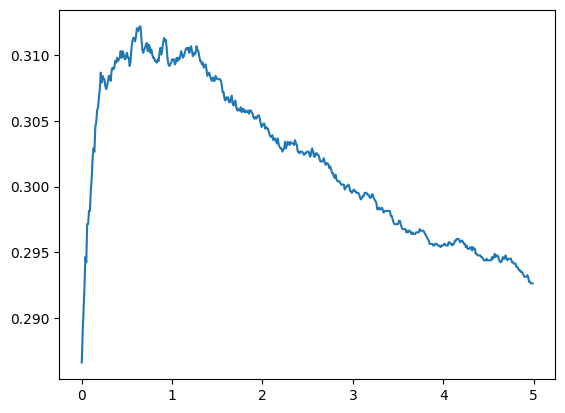

In [7]:
%%time

alphas = np.arange(0, 5, 0.01)

# Define train_and_predict()
def train_and_predict(alpha):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(X_train, y_train)
    y_pred_val = nb_classifier.predict(X_val)
    accuracy_score = metrics.accuracy_score(y_val, y_pred_val)
    return accuracy_score

best_score = 0
all_scores = []

# Iterate over the alphas
for alpha in alphas:
    new_score = train_and_predict(alpha)
    all_scores.append(new_score)
    if new_score > best_score:
      best_score = new_score
      best_alpha = alpha

print(best_alpha, best_score)
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=alphas,y=all_scores)

# Applying Softmax with TFIDF Vectorization

In [12]:
%%time

# 从 DataFrame 中获取文本内容和情感标签列
texts = data['cleaned_content'].tolist()
original_labels = data['sentiment'].tolist()
unique_labels = data['sentiment'].unique().tolist()

# 创建一个 Tokenizer 对象，用于文本预处理
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)

# 将文本转换为整数序列
sequences = tokenizer.texts_to_sequences(texts)

# 使用 pad_sequences 进行填充，以保证序列长度相同
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

# 创建情感类别的映射字典
label_map = {label: index for index, label in enumerate(unique_labels)}
num_classes = len(unique_labels)

# 将文本标签转换为索引
label_indices = [label_map[label] for label in original_labels]

# 使用 TensorFlow 的 one-hot 编码方法
one_hot_labels = tf.one_hot(label_indices, depth=num_classes)

# 构建 Softmax 回归模型
model = keras.Sequential([
    keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_sequence_length),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_classes, activation='softmax')
])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
optimizer = keras.optimizers.Adam(learning_rate=0.001)

# 编译模型
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# 划分测试集10%
test_size = int(0.1 * len(data))
train_data = padded_sequences[:len(data)-test_size]
test_data = padded_sequences[len(data)-test_size:]

train_labels = one_hot_labels[:len(data)-test_size]
#test_labels = one_hot_labels[len(data)-test_size:]
test_labels = original_labels[len(data)-test_size:]

# 训练模型
model.fit(train_data, train_labels, batch_size=32, epochs=10, validation_split=0.2, callbacks=[early_stopping])

# 预测情感类别
test_predictions = model.predict(test_data)
predicted_labels = [unique_labels[np.argmax(pred)] for pred in test_predictions]

# Calculate the accuracy score
accuracy_score = metrics.accuracy_score(test_labels, predicted_labels)
print(accuracy_score)

# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_labels, predicted_labels)
print(confusion_matrix)

print(classification_report(test_labels, predicted_labels))

Epoch 1/10
896/896 [==============================] - 32s 35ms/step - loss: 2.1250 - accuracy: 0.2734 - val_loss: 2.1981 - val_accuracy: 0.2405
Epoch 2/10
896/896 [==============================] - 30s 33ms/step - loss: 1.9105 - accuracy: 0.3631 - val_loss: 2.1633 - val_accuracy: 0.3009
Epoch 3/10
896/896 [==============================] - 31s 35ms/step - loss: 1.6561 - accuracy: 0.4592 - val_loss: 2.2437 - val_accuracy: 0.3053
Epoch 4/10
896/896 [==============================] - 29s 32ms/step - loss: 1.4079 - accuracy: 0.5559 - val_loss: 2.3078 - val_accuracy: 0.3001
Epoch 5/10
896/896 [==============================] - 30s 33ms/step - loss: 1.2109 - accuracy: 0.6396 - val_loss: 2.5015 - val_accuracy: 0.2857
Epoch 6/10
896/896 [==============================] - 30s 34ms/step - loss: 1.0617 - accuracy: 0.6931 - val_loss: 2.6970 - val_accuracy: 0.2797
Epoch 7/10
125/125 [==============================] - 0s 3ms/step
0.2790346907993967
[[  0   0   0   0   0   2   0   0   0   0   0   0  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
from google.colab import files
file_path = '/content/drive/My Drive/CS682/FinalProject/Milestone/tfidf.ipynb'
files.download(file_path)

FileNotFoundError: ignored